In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
from scipy import stats
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use('seaborn-white')

In [3]:
SMALL_SIZE = 7
MEDIUM_SIZE = 8
LARGE_SIZE = 10
BIGGER_SIZE = 12
plt.rc('font', size=LARGE_SIZE)     
plt.rc('axes', titlesize=MEDIUM_SIZE)    
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('axes', linewidth=0.5) 
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE) 
plt.rc('legend', fontsize=MEDIUM_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE, dpi=300, figsize=(5,4) )  

In [4]:
path_to_data="../data2/"
path_to_results="../results2/"

In [5]:
plt_df=pd.read_csv(path_to_data+"Data_for_Figure3BC.tsv",sep="\t",index_col=0)
plt_df

,CancerType,HRD_score,MSK_Sig3_ratio,Gender_sTP53m,HA_cases
P20001,KRC,0.0,0.00386,Female_TP53wt,0.0
P20002,SKCM,12.0,0.01005,Male_TP53wt,0.0
P20003,LUAD,18.0,0.00000,Female_TP53wt,0.0
P20004,SKCM,8.0,0.00000,Male_TP53wt,0.0
P20005,PRAD,4.0,0.00001,Male_TP53wt,0.0
...,...,...,...,...,...
P29843,BRC,14.0,0.00000,Female_TP53m,0.0
P29844,PAAD,7.0,0.00000,Male_TP53wt,0.0
P29845,LGG,4.0,0.08855,Female_TP53wt,0.0
P29846,CRC,9.0,0.00000,Male_TP53wt,0.0


In [6]:
from sklearn.metrics import roc_curve,roc_auc_score

def roc_auc_ci(y_true, y_score, positive=1):
    AUC = roc_auc_score(y_true, y_score)
    N1 = sum(y_true == positive)
    N2 = sum(y_true != positive)
    Q1 = AUC / (2 - AUC)
    Q2 = 2*AUC**2 / (1 + AUC)
    SE_AUC =((AUC*(1 - AUC) + (N1 - 1)*(Q1 - AUC**2) + (N2 - 1)*(Q2 - AUC**2)) / (N1*N2))**0.5
    lower = AUC - 1.96*SE_AUC
    upper = AUC + 1.96*SE_AUC
    if lower < 0:
        lower = 0
    if upper > 1:
        upper = 1
    return (lower, upper)

[44. 30. 18. 17.]
[[0.184 0.825]
 [0.399 0.778]
 [0.248 0.853]
 [0.255 0.8  ]]
[0.876 0.73  0.874 0.826]
[[0.845 0.907]
 [0.652 0.808]
 [0.829 0.918]
 [0.773 0.879]]


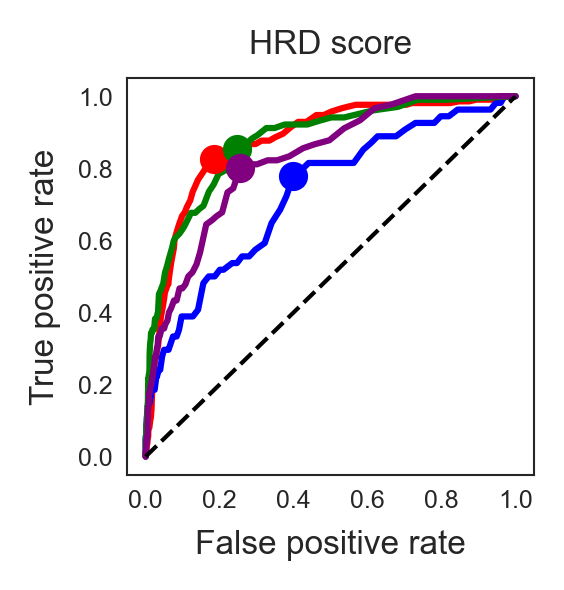

In [7]:
groups=['Female_TP53m', 'Male_TP53m', 'Female_TP53wt', 'Male_TP53wt']
labels=['Female TP53m', 'Male TP53m', 'Female TP53wt', 'Male TP53wt']
colors=["red","blue","green","purple"]
cutoffs,optimals,aucs,cis=[],[],[],[]

fig=plt.figure(figsize=(1.75,1.75))
ax=fig.add_subplot(111)
for i,group in enumerate(groups) :
    plt_df2=plt_df[ plt_df["Gender_sTP53m"]==group]
    plt_df2=plt_df2.dropna(subset=["HA_cases","HRD_score"])
    y_true=np.array(plt_df2["HA_cases"])
    y_score=np.array(plt_df2["HRD_score"])
    fpr, tpr, thresholds = roc_curve(y_true, y_score) 
    auc = np.round( roc_auc_score(y_true, y_score),3)
    ci1,ci2 = np.round( roc_auc_ci(y_true, y_score),3 )
    ax.plot(fpr,tpr,c=colors[i],ls="-",label=labels[i])
    optimal_idx = np.argmax(tpr - fpr)
    optimals.append( [fpr[optimal_idx],tpr[optimal_idx]] )
    cutoffs.append( thresholds[optimal_idx])
    aucs.append(auc)
    cis.append( (ci1,ci2) )
    
ax.set_xlabel("False positive rate",fontsize=MEDIUM_SIZE)
ax.set_ylabel("True positive rate",fontsize=MEDIUM_SIZE)
ax.legend(bbox_to_anchor=(1, 1), fontsize=MEDIUM_SIZE,labels=labels)

for i,point in enumerate(optimals):
    ax.plot( point[0],point[1],c=colors[i],marker="o")
ax.plot([0,1],[0,1],c="k",ls="--",lw=1)
ax.set_xticks( [0,0.2,0.4,0.6,0.8,1] )
ax.tick_params(labelsize=6)
ax.set_title("HRD score",fontsize=MEDIUM_SIZE)
ax.legend([])
plt.savefig(path_to_results+"Figure3C_1.png",bbox_inches="tight")

print(np.round(cutoffs,3))
print(np.round(optimals,3))
print(np.round(aucs,3))
print(np.round(cis,3))

[0.249 0.131 0.178 0.061]
[[0.164 0.711]
 [0.173 0.444]
 [0.143 0.392]
 [0.381 0.656]]
[0.815 0.641 0.64  0.639]
[[0.78  0.851]
 [0.56  0.722]
 [0.581 0.699]
 [0.577 0.702]]


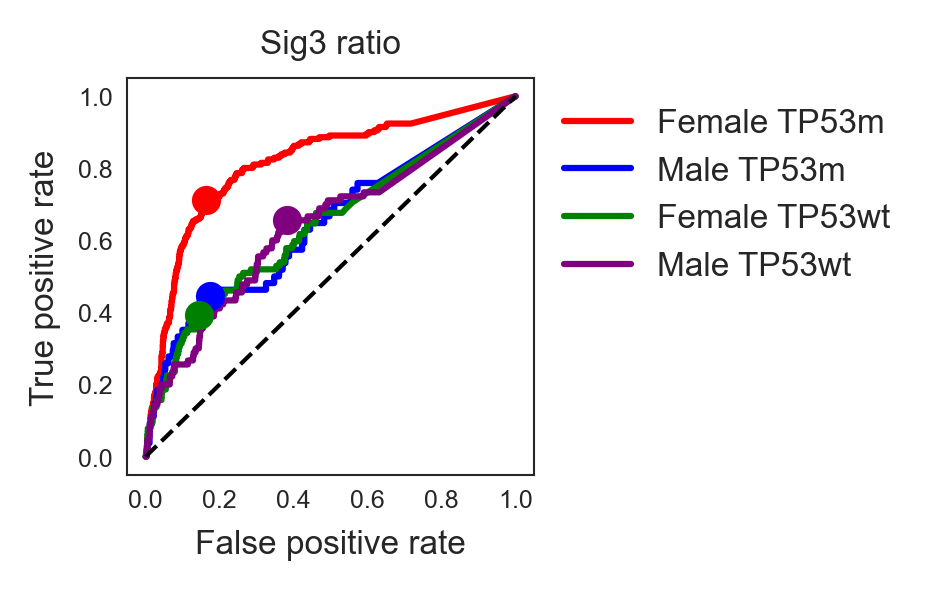

In [8]:
groups=['Female_TP53m', 'Male_TP53m', 'Female_TP53wt', 'Male_TP53wt']
labels=['Female TP53m', 'Male TP53m', 'Female TP53wt', 'Male TP53wt']
colors=["red","blue","green","purple"]
cutoffs2,optimals2,aucs2,cis2=[],[],[],[]

fig=plt.figure(figsize=(1.75,1.75))
ax=fig.add_subplot(111)
for i,group in enumerate(groups) :
    plt_df2=plt_df[ plt_df["Gender_sTP53m"]==group]
    plt_df2=plt_df2.dropna(subset=["HA_cases","MSK_Sig3_ratio"])
    y_true=np.array(plt_df2["HA_cases"])
    y_score=np.array(plt_df2["MSK_Sig3_ratio"])
    fpr, tpr, thresholds = roc_curve(y_true, y_score) 
    auc = np.round( roc_auc_score(y_true, y_score),3)
    ci1,ci2 = np.round( roc_auc_ci(y_true, y_score),3 )
    ax.plot(fpr,tpr,c=colors[i],ls="-",label=labels[i])
    optimal_idx = np.argmax(tpr - fpr)
    optimals2.append( [fpr[optimal_idx],tpr[optimal_idx]] )
    cutoffs2.append( thresholds[optimal_idx])
    aucs2.append(auc)
    cis2.append( (ci1,ci2) )
    
ax.set_xlabel("False positive rate",fontsize=MEDIUM_SIZE)
ax.set_ylabel("True positive rate",fontsize=MEDIUM_SIZE)
ax.legend(bbox_to_anchor=(1, 1), fontsize=MEDIUM_SIZE,labels=labels)

for i,point in enumerate(optimals2):
    ax.plot( point[0],point[1],c=colors[i],marker="o")
ax.plot([0,1],[0,1],c="k",ls="--",lw=1)
ax.set_xticks( [0,0.2,0.4,0.6,0.8,1] )
ax.tick_params(labelsize=6)
ax.set_title("Sig3 ratio",fontsize=MEDIUM_SIZE)
plt.savefig(path_to_results+"Figure3C_2.png",bbox_inches="tight")

print(np.round(cutoffs2,3))
print(np.round(optimals2,3))
print(np.round(aucs2,3))
print(np.round(cis2,3))

Female_TP53m rS= 0.473 p= 8.75e-107
Male_TP53m rS= 0.126 p= 9.30e-08
Female_TP53wt rS= 0.117 p= 1.44e-10
Male_TP53wt rS= 0.044 p= 2.06e-02


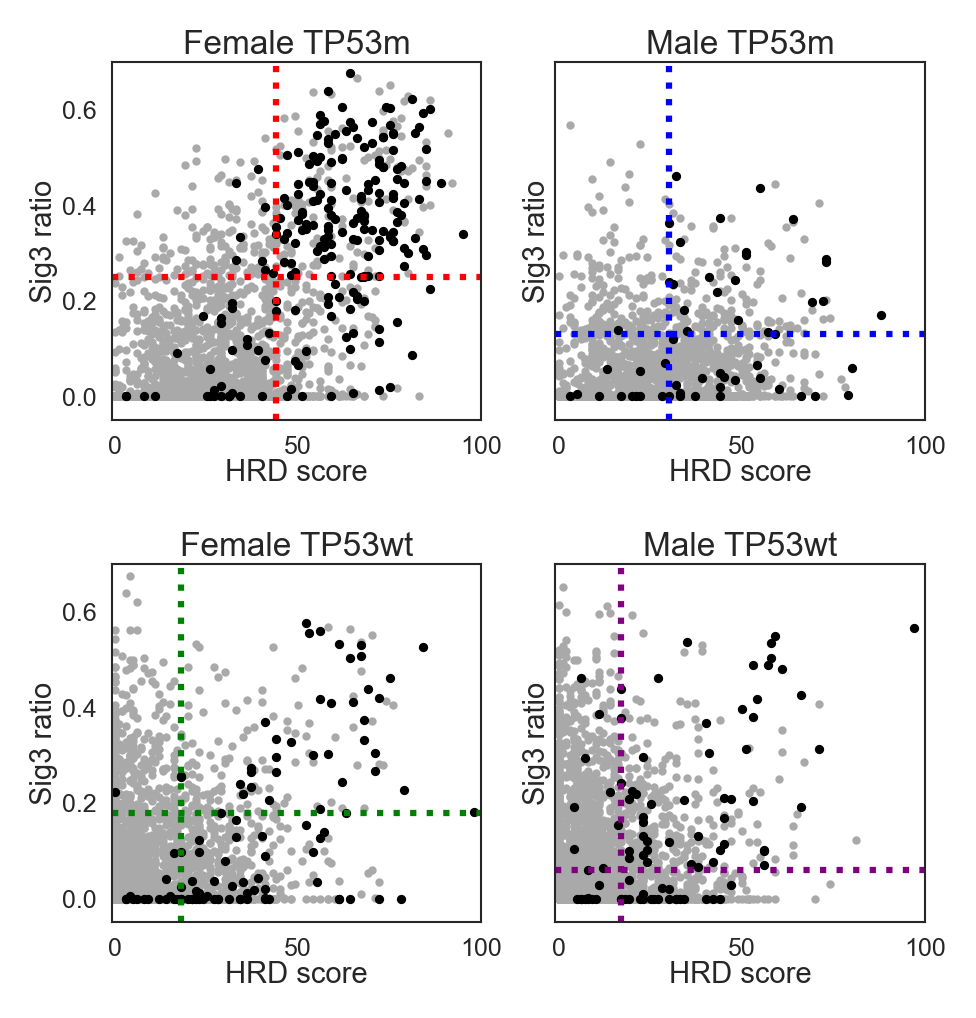

In [9]:
groups=['Female_TP53m', 'Male_TP53m', 'Female_TP53wt', 'Male_TP53wt']
labels=['Female TP53m', 'Male TP53m', 'Female TP53wt', 'Male TP53wt']

val1="HRD_score"
val2="MSK_Sig3_ratio"
fig=plt.figure(figsize=(3.5,3.8))
rSs,pvals=[],[]
for i,group in enumerate(groups) :
    ax=fig.add_subplot(2,2,i+1)
    plt_df2=plt_df[ (plt_df["Gender_sTP53m"]==group)&(plt_df["HA_cases"]==0)]
    x=plt_df2[val1]
    y=plt_df2[val2]
    ax.scatter(x,y,c="darkgrey",s=1)
    
    plt_df2=plt_df[ (plt_df["Gender_sTP53m"]==group)&(plt_df["HA_cases"]==1)]
    x=plt_df2[val1]
    y=plt_df2[val2]
    ax.scatter(x,y,c="black",s=1.5)
    
    ax.axvline(x=cutoffs[i],ls="dotted",c=colors[i],lw=1.5)
    ax.axhline(y=cutoffs2[i],ls="dotted",c=colors[i],lw=1.5)
    
    ax.set_xlim(-1,100)
    ax.set_ylim(-0.05,0.7)
    ax.set_title(labels[i],fontsize=8,y=1.0, pad=2)
    ax.set_xlabel("HRD score",fontsize= SMALL_SIZE,labelpad=0)
    ax.set_ylabel("Sig3 ratio",fontsize=SMALL_SIZE,labelpad=1)
    
    if i in [1,3]:
        #ax.set_ylabel("")
        ax.set_yticks([])
        
    ax.tick_params(labelsize=6)
    
    plt_df2=plt_df[ (plt_df["Gender_sTP53m"]==group)]
    x=plt_df2[val1]
    y=plt_df2[val2]
    r,p=stats.spearmanr(x,y,nan_policy="omit")
    rS="{:.3f}".format(r)
    pval="{:.2e}".format(p)
    print(group, "rS=", rS, "p=", pval)
    rSs.append(rS)
    pvals.append(pval)
    
plt.subplots_adjust(hspace=0.4)
plt.savefig(path_to_results+"Figure3B.png",bbox_inches="tight")

In [10]:
table=pd.DataFrame({"Spearman coef":rSs,"Spearman pvalue":pvals,"HRD_cutoff":cutoffs,"HRD_AUC":aucs,"HRD_95%CI":cis,
                          "Sig3_cutoff":cutoffs2,"Sig3_AUC":aucs2,"Sig3_95%CI":cis2},index=labels)
table.to_csv(path_to_results+"Figure3D_table.tsv",sep="\t")
table

,Spearman coef,Spearman pvalue,HRD_cutoff,HRD_AUC,HRD_95%CI,Sig3_cutoff,Sig3_AUC,Sig3_95%CI
Female TP53m,0.473,8.75e-107,44.0,0.876,"(0.845, 0.907)",0.24886,0.815,"(0.78, 0.851)"
Male TP53m,0.126,9.30e-08,30.0,0.730,"(0.652, 0.808)",0.13100,0.641,"(0.56, 0.722)"
Female TP53wt,0.117,1.44e-10,18.0,0.874,"(0.829, 0.918)",0.17830,0.640,"(0.581, 0.699)"
Male TP53wt,0.044,2.06e-02,17.0,0.826,"(0.773, 0.879)",0.06057,0.639,"(0.577, 0.702)"


# excluding BRCA-associated cancers

Female_TP53m rS=0.209, p=5.46e-13
Male_TP53m rS=0.125, p=2.61e-07
Female_TP53wt rS=0.076, p=2.54e-04
Male_TP53wt rS=0.011, p=5.87e-01


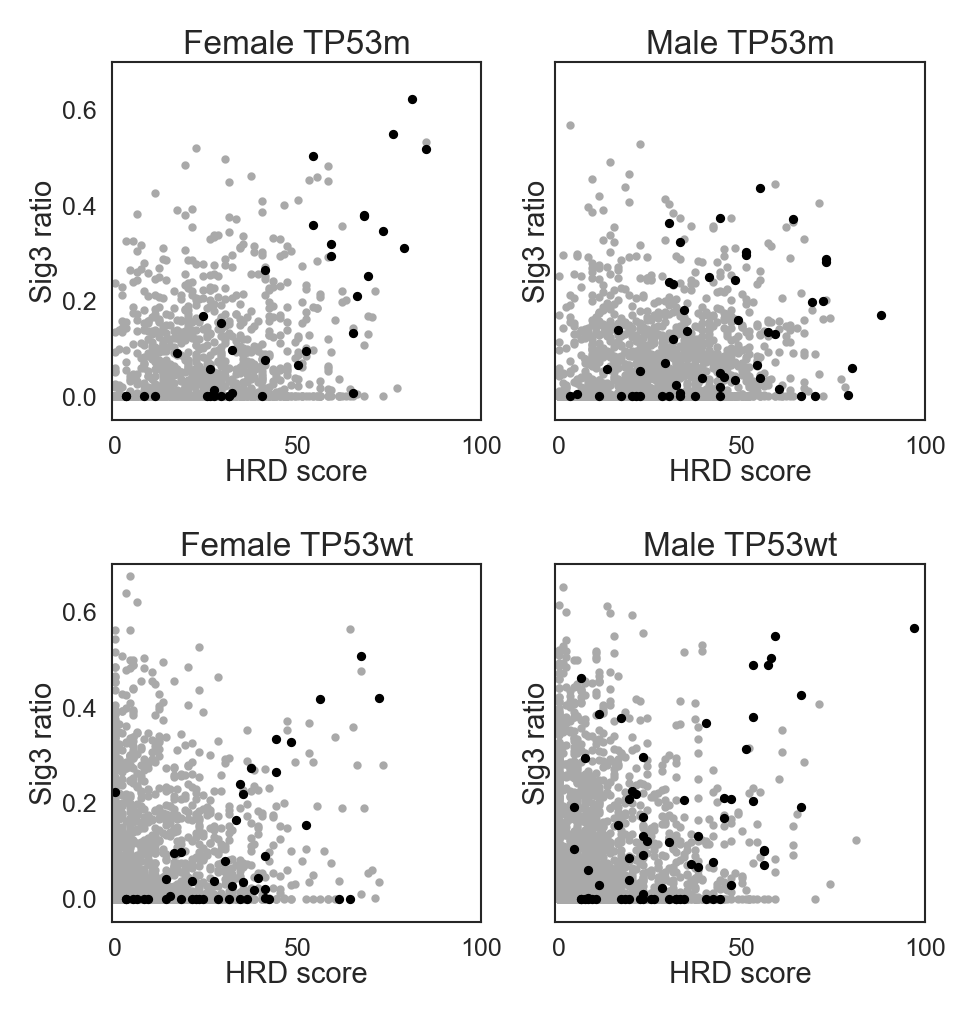

In [11]:
groups=['Female_TP53m', 'Male_TP53m', 'Female_TP53wt', 'Male_TP53wt']
labels=['Female TP53m', 'Male TP53m', 'Female TP53wt', 'Male TP53wt']

val1="HRD_score"
val2="MSK_Sig3_ratio"
fig=plt.figure(figsize=(3.5,3.8 ))
for i,group in enumerate(groups) :
    ax=fig.add_subplot(2,2,i+1)
    tmp_df=plt_df[ (plt_df["Gender_sTP53m"]==group)&(plt_df["HA_cases"]==0)]
    tmp_df2=tmp_df[~tmp_df["CancerType"].isin(["OV","BRC","PRAD","PAAD"])]
    x=tmp_df2[val1]
    y=tmp_df2[val2]
    ax.scatter(x,y,c="darkgrey",s=1)
    tmp_df=plt_df[ (plt_df["Gender_sTP53m"]==group)&(plt_df["HA_cases"]==1)]
    tmp_df2=tmp_df[~tmp_df["CancerType"].isin(["OV","BRC","PRAD","PAAD"])]
    x=tmp_df2[val1]
    y=tmp_df2[val2]
    ax.scatter(x,y,c="black",s=1.5)
    ax.set_xlim(-1,100)
    ax.set_ylim(-0.05,0.7)

    ax.set_title(labels[i],fontsize=8,y=1.0, pad=2)
    ax.set_xlabel("HRD score",fontsize= SMALL_SIZE,labelpad=0)
    ax.set_ylabel("Sig3 ratio",fontsize=SMALL_SIZE,labelpad=1)
    
    if i in [1,3]:
        ax.set_yticks([])
        
    ax.tick_params(labelsize=6)
    
    tmp_df=plt_df[ (plt_df["Gender_sTP53m"]==group)]
    tmp_df2=tmp_df[~tmp_df["CancerType"].isin(["OV","BRC","PRAD","PAAD"])]
    x=tmp_df2[val1]
    y=tmp_df2[val2]
    r,p=stats.spearmanr(x,y,nan_policy="omit")
    print(group, "rS={:.3f}, p={:.2e}".format(r,p))

plt.subplots_adjust(hspace=0.4)
plt.savefig(path_to_results+"Supplement_Figure6_5.png",dpi=300,bbox_inches="tight")